# Author: Ayush Tiwari

#  DATASET : Machine Learning “S&P 500 stock data” 




# Importing the libraries


In [1]:

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import seaborn as sns

%matplotlib inline

# Reading the dataset

In [2]:
df = pd.read_csv('AMZN_data.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [3]:

df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,576.867264,582.017221,571.113517,576.880041,3.730465e+06
std,282.500019,284.417123,280.215237,282.500395,2.166506e+06
min,248.940000,252.930000,245.750000,248.230000,1.092970e+06
25%,325.870000,329.485000,322.185000,325.800000,2.511165e+06
50%,506.000000,512.330000,495.640000,503.820000,3.144719e+06
75%,777.620000,781.845000,770.720000,777.420000,4.220246e+06
max,1477.390000,1498.000000,1450.040000,1450.890000,2.385606e+07


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


# Cleaning the data


In [5]:
df.drop(['Name'],axis=1,inplace=True)
df

,date,open,high,low,close,volume
0,2013-02-08,261.40,265.25,260.555,261.95,3879078
1,2013-02-11,263.20,263.25,256.600,257.21,3403403
2,2013-02-12,259.19,260.16,257.000,258.70,2938660
3,2013-02-13,261.53,269.96,260.300,269.47,5292996
4,2013-02-14,267.37,270.65,265.400,269.24,3462780
...,...,...,...,...,...,...
1254,2018-02-01,1445.00,1459.88,1385.140,1390.00,9113808
1255,2018-02-02,1477.39,1498.00,1414.000,1429.95,11125722
1256,2018-02-05,1402.62,1458.98,1320.720,1390.00,11494985
1257,2018-02-06,1361.46,1443.99,1351.790,1442.84,11066819


In [6]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

<AxesSubplot:>

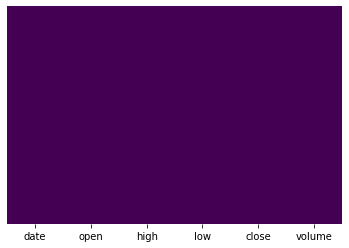

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# Find Missing Values


In [8]:
df.open.fillna(df.open.mean(),inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [9]:
df.high.fillna(value=0,inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [10]:
df.low.fillna(value=0,inplace=True)
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

#  Visualizing the stock price

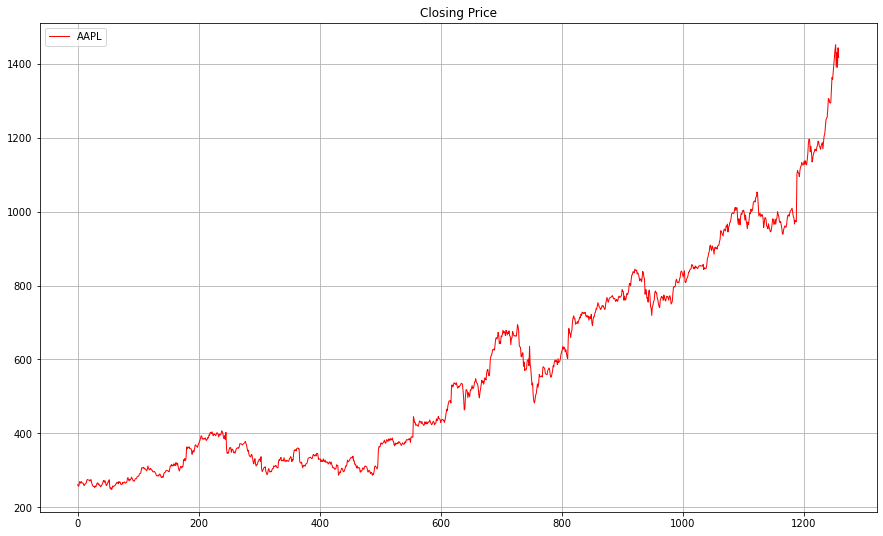

In [11]:


df[ 'close'].plot(label='AAPL', figsize=(15, 9), title='Closing Price', color='red', linewidth=1.0, grid=True)
plt.legend()

In [12]:
# Rolling Mean / Moving Average to remove the noise in the graph and smoothen it

close_col = df['close']
mvag = close_col.rolling(window=100).mean()     # Taking an average over the window size of 100.
# Increasing the window size can make it more smoother, but less informative and vice-versa.

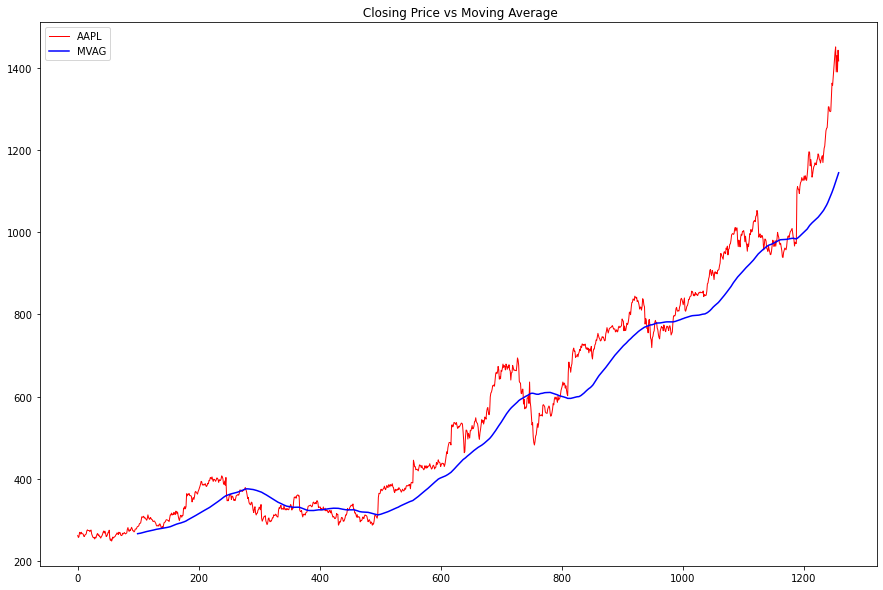

In [13]:
# Visualizing Rolling Mean and Adjusted Closing Price together

df['close'].plot(label='AAPL', figsize=(15,10), title=' Closing Price vs Moving Average', color='red', linewidth=1.0, grid=True)
mvag.plot(label='MVAG', color='blue')
plt.legend()

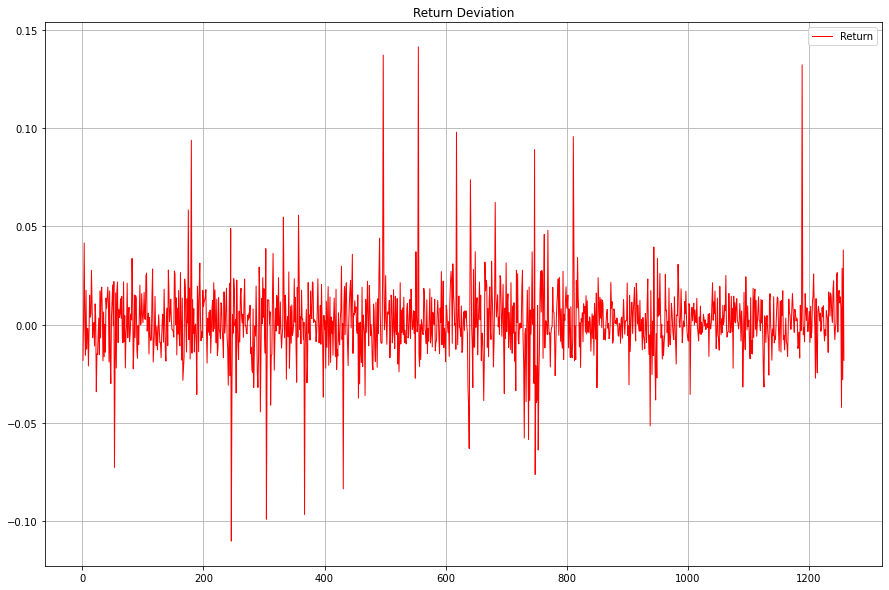

In [14]:
# Return Deviation measures the Mean of the Probability Distribution of Investment Returns if it has a positive/negative Average Net Outcome

rd = close_col / close_col.shift(1) - 1
rd.plot(label='Return', figsize=(15, 10), title='Return Deviation', color='red', linewidth=1.0, grid=True)
plt.legend()

In [15]:
# Number of days for which to predict the stock prices

predict_days = 30

In [16]:
# Shifting by the Number of Predict days for Prediction array

df['Prediction'] = df['close'].shift(-predict_days)
# print(df['Prediction'])
# print(df['close'])

In [17]:

# Dropping the Prediction Row

X = np.array(df.drop(['Prediction'], axis = 1))
X = X[:-predict_days]      # Size upto predict days
# print(X)
print(X.shape)

(1229, 6)


In [18]:
# Creating the Prediction Row

y = np.array(df['Prediction'])
y = y[:-predict_days]      # Size upto predict_days
# print(y)
print(y.shape)

(1229,)


# Splitting the data into Training data & Testing data


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)      #Splitting the data into 80% for training & 20% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(983, 6)
(983,)
(246, 6)
(246,)


In [20]:
X = df.drop(columns=['close','date'])
y = df['close']
X

,open,high,low,volume,Prediction
0,261.40,265.25,260.555,3879078,256.02
1,263.20,263.25,256.600,3403403,260.31
2,259.19,260.16,257.000,2938660,265.30
3,261.53,269.96,260.300,5292996,266.49
4,267.37,270.65,265.400,3462780,261.61
...,...,...,...,...,...
1254,1445.00,1459.88,1385.140,9113808,NaN
1255,1477.39,1498.00,1414.000,11125722,NaN
1256,1402.62,1458.98,1320.720,11494985,NaN
1257,1361.46,1443.99,1351.790,11066819,NaN


# Training the model and performing  Linear Regression

In [21]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [22]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

In [23]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [24]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['close']

In [25]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  0.7255994324874849
Intercept:  120.66598999285861


<ipython-input-26-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


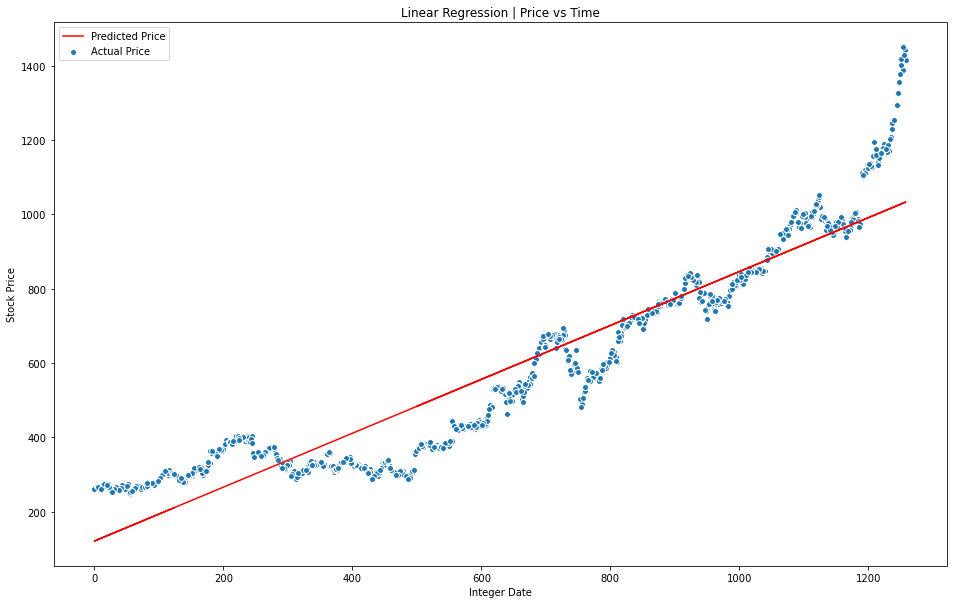

In [27]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [28]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['close']

In [29]:

# Generate array with predicted values
y_pred = model.predict(X_test)

In [30]:
# Get number of rows in data set for random sample
df.shape

(1259, 7)

In [31]:
# Generate 25 random numbers
randints = np.random.randint(1259 , size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [32]:

df_sample.head()

,date,open,high,low,close,volume,Prediction
9,2013-02-22,266.62,267.1100,261.610,265.42,3123402,258.95
17,2013-03-06,275.76,276.4890,271.832,273.79,2050452,259.42
92,2013-06-21,274.57,275.8399,269.790,273.36,4202058,300.99
262,2014-02-25,353.00,361.0800,351.580,358.32,3747076,327.07
265,2014-02-28,360.60,365.8650,357.084,362.10,3885207,311.73


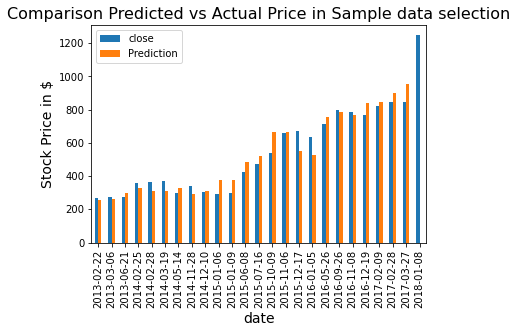

In [33]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='date', y=['close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

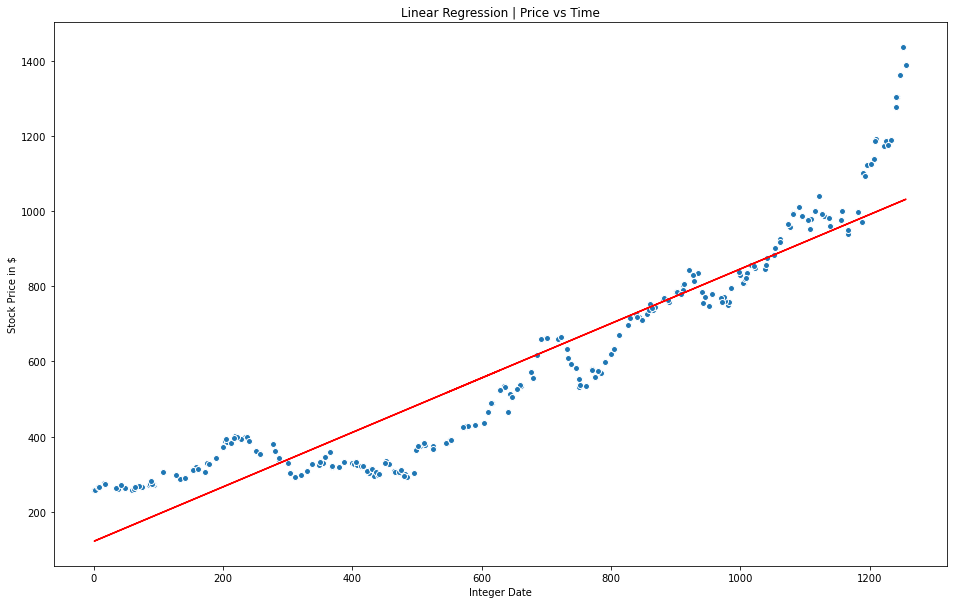

In [34]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price in $')

plt.show()


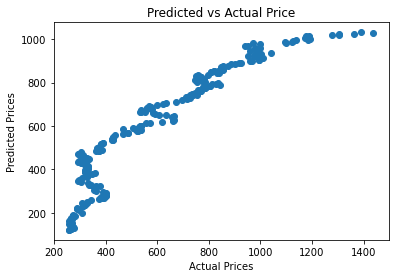

In [35]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

# Residual Histogram


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


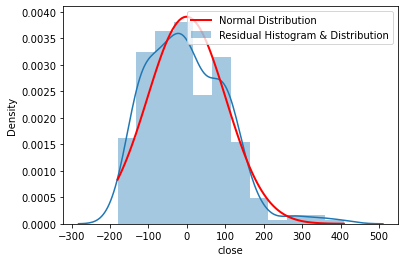

In [36]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [37]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

# Error Evaluation Metrics

In [38]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [39]:
# Statistical summary of test data
df['close'].describe()

count    1259.000000
mean      576.880041
std       282.500395
min       248.230000
25%       325.800000
50%       503.820000
75%       777.420000
max      1450.890000
Name: close, dtype: float64

# Calculate and print values of MAE, MSE, RMSE

In [40]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 81.80903960007103
Mean Squared Error: 10422.49065273175
Root Mean Squared Error: 102.09060021731555
